# **Análisis contratación Escuela Superior de Administración Pública 2020-2024**

## Introducción

En este documento se presenta la aplicación de diferentes metodologías estudiadas en el curso de Programación II de la Maestría en Inteligencia de Negocios de la Universidad de Externado de Colombia. Lo anterior, se da en un ambiente de análisis y comprensión del fenómeno de la contratación pública a partir de la exploración de  diferentes escenarios aplicados a la realidad de las Entidades Públicas de Colombia. 

En este sentido, se exploran y analizan los resultados del modelo de efectos fijos del panel de datos de la contratación de la Escuela Superior de Administración Pública como individuo de análisis del 2020 a 2024 según los datos abiertos publicados por la Agencia Nacional de Contratación Pública - Colombia Compra Efienciete sobre el data set [SECOP II - Contratos Electrónicos](https://www.datos.gov.co/Gastos-Gubernamentales/SECOP-II-Contratos-Electr-nicos/jbjy-vk9h/about_data).

 De esta forma, se exploran ambientes y técnicas propicios en el contexto del aprendizaje sobre programación y en la aplicación de métodos estadísticos para la profundización y reconocimiento del fenómeno de estudio a la luz del procesamiento, depuración y análisis de la información, todos ellos necesarios en el actual contexto en donde es indispensable el uso de herramientas para la gestión de los datos y de la información en las organizaciones para el análisis y la toma de decisiones sobre los fenónemos que les afectan.

## Objetivo general

Analizar el efecto que tiene el tiempo de ejecución del proceso de contratación sobre el valor total de los contratos en la Escuela Superior de Administración Pública.

## Objetivos específicos

*$1.$* Explorar métodos de limpieza, depuración y automatización de la bases datos de contratos de la Escuela Superior de Administración Pública a partir del uso y aprovechamiento de los datos e información de del data set [SECOP II - Contratos Electrónicos](https://www.datos.gov.co/Gastos-Gubernamentales/SECOP-II-Contratos-Electr-nicos/jbjy-vk9h/about_data)


*$2.$* Aplicar técnicas para medir el efecto del tiempo de ejecución de la contratación pública sobre el valor de los contratos celebrados por la Escuela Superior de Administración Pública durante el período 2020-2024

*$3.$* Analizar el fenómeno de la contratación pública con Colombia con el propósito de brindar recomendaciones sobre el buen manejo de los recursos públicos a los sujetos responsables de su ejecución

## Antecedentes

A partir de la adopción de los principios de la Función Administrativa (Art. 209) de la Constitución Política de 1991, el Sector Público Colombiano ha desarrollado diferentes acciones para sinterizar un Sistema de Gestión que responda a las necesidades de articulación de los elementos que intervienen al momento de dirigir la gestión pública  hacia “el mejor desempeño institucional y a la consecución de resultados para la satisfacción de las necesidades y el goce efectivo de los derechos de los ciudadanos, en el marco de la legalidad y la integridad” (DAFP, 2019, p. 19).
<!--  -->
El Sistema de Gestión vigente (Art. 133 - Ley 1753 de 2015) integra el Sistema de Desarrollo Administrativo (Ley 489 de 1998), el Sistema de Gestión de la Calidad (Ley 872 de 2003) y se articula con el Sistema de Control Interno (Ley 87 de 1993 y del Art. 27 al 19 de la Ley 489); que finalmente constituyen el MIPG como el mecanismo que facilita la integración y articulación de los Sistemas de Planeación y Gestión que hasta el momento existían en la entidades públicas colombianas (Decreto 1499 de 2017), integró en 2021 a partir del la Política de Gestión y desempeño **Compras y Contatación Pública** con el fin de que las entidades estatales gestionen adecuadamente sus compras y contrataciones públicas a través de herramientas tecnológicas, lineamientos normativos, documentos estándar, técnicas de abastecimiento estratégico e instrumentos de agregación de demanda. 

De esta forma, con esta política la Agencia Nacional de Contratación Pública - Colombia Compra Efienciente, proyecta el suministro de una herramienta como lo es el SECOP II para que las entidades estatales  se alinien con el propósito de generar buenas mejores prácticas en el abastecimiento y contratación y con ello fortalecer la satisfacción de las necesidades públicas (eficacia), con menores recursos (eficiencia), altos estándares de calidad, pluralidad de oferentes y garantía de transparencia y rendición de cuentas.

Sin embargo, aun cuando la integración de lineamientos en materia de contratación pública sea un propósito de la administración pública conducente al buen manejo del prespuesto y a la planeación de las finanzas públicas, esto resulta en un reto su implementación y aprovechamiento para la toma de decisones en el ámbito de la contratación pública. Los procedimientos que rigen la contratación deben verse reflejados en la planeación de la contratación y se deben implementar en contextos de alta incertidumbre que las organizaciones constantemente reflejan.

En este sentido, para evidenciar lo anteriormente expuesto, se trata de analizar el efecto que tiene el tiempo de ejecución de los procesos de contratación sobre el valor de la contratación de la Escuela Superior Pública, vista en este análisis como un individuo sobre el el cual es posible su estudio a la luz de los objetivos planteados en este proyecto y según la información disponible en el data set datos abiertos publicados por la Agencia Nacional de Contratación Pública - Colombia Compra Efienciete sobre el data set [SECOP II - Contratos Electrónicos] (https://www.datos.gov.co/Gastos-Gubernamentales/)


### _Libreriras_

In [598]:
!pip install sodapy
!pip install seaborn
!pip install pandas
!pip install plotly
!pip install linearmodels
!pip install scikit-learn

In [599]:
#Pandas y Nunmpy
import pandas as pd
import numpy as np
#Transformación de fecha
from datetime import datetime
#Gráficas
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from datetime import datetime
import plotly.express as px
import plotly.graph_objects as go
#Se importa la clase PanelOLS, que se utiliza para realizar regresiones lineales en modelos de panel
# o conjuntos de series temporales cruzadas y estimar relaciones lineales.
from linearmodels.panel import PanelOLS
import pandas as pd
#Se importa la biblioteca "statsmodels" y la renombra como "sm" 
#Statsmodels es una biblioteca que proporciona herramientas y modelos estadísticos para el análisis 
#de datos en Python. Se utiliza comúnmente para realizar análisis de regresión, 
#series de tiempo y otras técnicas estadísticas.
import statsmodels.api as sm

### _Exploración de la base de datos_

#### _Cargar base de datos_

Se utiliza la base de datos contratos_secop_esap del data set [SECOP II - Contratos Electrónicos] (https://www.datos.gov.co/Gastos-Gubernamentales/)


In [600]:
ar = r'C:\Users\Astrandrea\Documents\AnaConESAP\datos\raw\contratos_secop_esap.csv'

In [601]:
pd.set_option("display.max.columns", 999)
# Se cambia la configuración para ver los números de la forma 1.000.000
pd.options.display.float_format = "{:,.0f}".format
secop = pd.read_csv(ar)
secop

,Unnamed: 0,nombre_entidad,nit_entidad,departamento,ciudad,localizaci_n,orden,sector,rama,entidad_centralizada,proceso_de_compra,id_contrato,referencia_del_contrato,estado_contrato,codigo_de_categoria_principal,descripcion_del_proceso,tipo_de_contrato,modalidad_de_contratacion,justificacion_modalidad_de,fecha_de_firma,fecha_de_fin_del_contrato,condiciones_de_entrega,tipodocproveedor,documento_proveedor,proveedor_adjudicado,es_grupo,es_pyme,habilita_pago_adelantado,liquidaci_n,obligaci_n_ambiental,obligaciones_postconsumo,reversion,origen_de_los_recursos,destino_gasto,valor_del_contrato,valor_de_pago_adelantado,valor_facturado,valor_pendiente_de_pago,valor_pagado,valor_amortizado,valor_pendiente_de,valor_pendiente_de_ejecucion,estado_bpin,c_digo_bpin,anno_bpin,saldo_cdp,saldo_vigencia,espostconflicto,dias_adicionados,puntos_del_acuerdo,pilares_del_acuerdo,urlproceso,nombre_representante_legal,nacionalidad_representante_legal,domicilio_representante_legal,tipo_de_identificaci_n_representante_legal,identificaci_n_representante_legal,g_nero_representante_legal,presupuesto_general_de_la_nacion_pgn,sistema_general_de_participaciones,sistema_general_de_regal_as,recursos_propios_alcald_as_gobernaciones_y_resguardos_ind_genas_,recursos_de_credito,recursos_propios,ultima_actualizacion,codigo_entidad,codigo_proveedor,objeto_del_contrato,fecha_de_inicio_del_contrato,fecha_de_inicio_de_ejecucion,fecha_de_fin_de_ejecucion,fecha_inicio_liquidacion,fecha_fin_liquidacion
0,0,ESCUELA SUPERIOR DE ADMINISTRACIÓN PUBLICA,899999054,Distrito Capital de Bogotá,Bogotá,"Colombia, Bogotá, Bogotá",Nacional,Servicio Público,Ejecutivo,Centralizada,CO1.BDOS.5473717,CO1.PCCNTR.5793225,BOG-245-2024,Activo,V1.93151500,Prestar servicios profesionales como abogado b...,Prestación de servicios,Contratación directa,Servicios profesionales y apoyo a la gestión,2024-01-23T00:00:00.000,2024-10-22T00:00:00.000,A convenir,Cédula de Ciudadanía,1019088195,KATTY BALAGUERA,No,No,No,No,No,No,No,Recursos Propios,Inversión,60568000,0,0,60568000,0,0,0,60568000,No Válido,No Definido,No D,60568000,0,No,0,No aplica,No aplica,{'url': 'https://community.secop.gov.co/Public...,katty jobanna balaguera bustos,CO,No Definido,Cédula de Ciudadanía,1019088195,Femenino,0,0,0,0,0,60568000,2024-01-23T00:00:00.000,701255226,720247055,Prestar servicios profesionales como abogado b...,NaN,NaN,NaN,NaN,NaN
1,1,ESCUELA SUPERIOR DE ADMINISTRACIÓN PUBLICA,899999054,Distrito Capital de Bogotá,Bogotá,"Colombia, Bogotá, Bogotá",Nacional,Servicio Público,Ejecutivo,Centralizada,CO1.BDOS.1645381,CO1.PCCNTR.2109860,BOG-024-2021,En ejecución,V1.80111600,Prestar servicios profesionales para la planea...,Prestación de servicios,Contratación directa,Servicios profesionales y apoyo a la gestión,2021-01-10T00:00:00.000,2021-08-31T00:00:00.000,A convenir,Cédula de Ciudadanía,1022360809,Angie Nataly Ruiz Rodriguez,No,No,No,No,No,No,No,Recursos Propios,Inversión,76293762,0,38146881,38146881,38146881,0,0,38146881,No Válido,No Definido,2021,56902064,0,No,0,No aplica,No aplica,{'url': 'https://community.secop.gov.co/Public...,Angie Nataly Ruiz Rodriguez,CO,No Definido,Cédula de Ciudadanía,1022360809,Femenino,0,0,0,0,0,76293762,NaN,701255226,706380524,Prestar servicios profesionales para la planea...,2021-01-14T00:00:00.000,NaN,NaN,NaN,NaN
2,2,ESCUELA SUPERIOR DE ADMINISTRACIÓN PUBLICA,899999054,Distrito Capital de Bogotá,Bogotá,"Colombia, Bogotá, Bogotá",Nacional,Servicio Público,Ejecutivo,Centralizada,CO1.BDOS.3746547,CO1.PCCNTR.4396488,BOG-005-2023,En ejecución,V1.93151500,PRESTAR SERVICIOS PROFESIONALES REALIZANDO ACO...,Prestación de servicios,Contratación directa,Servicios profesionales y apoyo a la gestión,2023-01-13T00:00:00.000,2023-05-01T00:00:00.000,A convenir,Cédula de Ciudadanía,1026272842,ERIKA ASTRID MENDEZ MORENO,No,No,No Definido,No,No,No,No,Recursos Propios,Funcionamiento,31720000,0,31720000,0,31720000,0,0,0,No Válido,No Definido,No D,31720000,0,No,0,No aplica,No aplica,{'url': 'https://community.seco

#### _Descripción de la base de datos_

La base de datos tiene 5.389 contratos y 73 columnas

In [602]:
secop.shape

(5389, 73)

La base de datos tiene 21 variables *numéricas* y 52 variables de *texto*. 

In [603]:
secop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5389 entries, 0 to 5388
Data columns (total 73 columns):
 #   Column                                                            Non-Null Count  Dtype 
---  ------                                                            --------------  ----- 
 0   Unnamed: 0                                                        5389 non-null   int64 
 1   nombre_entidad                                                    5389 non-null   object
 2   nit_entidad                                                       5389 non-null   int64 
 3   departamento                                                      5389 non-null   object
 4   ciudad                                                            5389 non-null   object
 5   localizaci_n                                                      5389 non-null   object
 6   orden                                                             5389 non-null   object
 7   sector                                    

In [604]:
secop.columns

Index(['Unnamed: 0', 'nombre_entidad', 'nit_entidad', 'departamento', 'ciudad',
       'localizaci_n', 'orden', 'sector', 'rama', 'entidad_centralizada',
       'proceso_de_compra', 'id_contrato', 'referencia_del_contrato',
       'estado_contrato', 'codigo_de_categoria_principal',
       'descripcion_del_proceso', 'tipo_de_contrato',
       'modalidad_de_contratacion', 'justificacion_modalidad_de',
       'fecha_de_firma', 'fecha_de_fin_del_contrato', 'condiciones_de_entrega',
       'tipodocproveedor', 'documento_proveedor', 'proveedor_adjudicado',
       'es_grupo', 'es_pyme', 'habilita_pago_adelantado', 'liquidaci_n',
       'obligaci_n_ambiental', 'obligaciones_postconsumo', 'reversion',
       'origen_de_los_recursos', 'destino_gasto', 'valor_del_contrato',
       'valor_de_pago_adelantado', 'valor_facturado',
       'valor_pendiente_de_pago', 'valor_pagado', 'valor_amortizado',
       'valor_pendiente_de', 'valor_pendiente_de_ejecucion', 'estado_bpin',
       'c_digo_bpin', 'ann

#### _Limpieza de la base de datos_

_Arreglo de fechas_

In [605]:
# Lista de columnas para convertir a datetime
columnas_fecha = ['fecha_de_firma', 'fecha_de_inicio_del_contrato', 'fecha_de_fin_del_contrato',
                  'fecha_de_inicio_de_ejecucion', 'fecha_de_fin_de_ejecucion', 
                  'fecha_inicio_liquidacion', 'fecha_fin_liquidacion']

# Iterar sobre cada columna y aplicar la transformación
for col in columnas_fecha:
    secop[col] = secop[col].str.split('T').str[0]
    secop[col] = pd.to_datetime(secop[col], format='%Y-%m-%d', errors='coerce')

_Extraer el año_

In [606]:
columnas_fecha = [
    'fecha_de_firma', 'fecha_de_inicio_del_contrato', 'fecha_de_fin_del_contrato',
    'fecha_de_inicio_de_ejecucion', 'fecha_de_fin_de_ejecucion',
    'fecha_inicio_liquidacion', 'fecha_fin_liquidacion'
]

# Asegurar que las columnas de fecha son del tipo datetime
for col in columnas_fecha:
    secop[col] = pd.to_datetime(secop[col], errors='coerce')

# Crear nuevas columnas para el año
for col in columnas_fecha:
    secop[f'ano_{col}'] = secop[col].dt.year

#### _Análisis exploratorio_

##### _Estadísticas descriptivas_

In [607]:
secop.describe()

,Unnamed: 0,nit_entidad,fecha_de_firma,fecha_de_fin_del_contrato,valor_del_contrato,valor_de_pago_adelantado,valor_facturado,valor_pendiente_de_pago,valor_pagado,valor_amortizado,valor_pendiente_de,valor_pendiente_de_ejecucion,saldo_cdp,saldo_vigencia,dias_adicionados,presupuesto_general_de_la_nacion_pgn,sistema_general_de_participaciones,sistema_general_de_regal_as,recursos_propios_alcald_as_gobernaciones_y_resguardos_ind_genas_,recursos_de_credito,recursos_propios,codigo_entidad,codigo_proveedor,fecha_de_inicio_del_contrato,fecha_de_inicio_de_ejecucion,fecha_de_fin_de_ejecucion,fecha_inicio_liquidacion,fecha_fin_liquidacion,ano_fecha_de_firma,ano_fecha_de_inicio_del_contrato,ano_fecha_de_fin_del_contrato,ano_fecha_de_inicio_de_ejecucion,ano_fecha_de_fin_de_ejecucion,ano_fecha_inicio_liquidacion,ano_fecha_fin_liquidacion
count,"5,389","5,389",5389,5389,"5,389","5,389","5,389","5,389","5,389","5,389","5,389","5,389","5,389","5,389","5,389","5,389","5,389","5,389","5,389","5,389","5,389","5,389","5,389",5325,402,402,0,0,"5,389","5,325","5,389",402,402,0,0
mean,"2,694","899,999,054",2022-03-31 12:28:27.478196480,2022-11-03 02:01:34.859899648,"77,396,645","300,533","18,609,155","61,894,300","15,502,345",0,"300,533","61,894,300","82,025,091","11,708,723",8,"9,086,637",0,0,"1,550,021","42,623","53,729,805","701,255,226","706,696,617",2022-03-26 18:08:59.492957696,2020-02-10 04:39:24.179104512,2020-12-18 16:28:39.402984960,NaT,NaT,"2,022","2,022","2,022","2,020","2,021",NaN,NaN
min,0,"899,999,054",2020-01-02 00:00:00,2020-01-11 00:00:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"701,255,226",0,2020-01-03 00:00:00,2020-01-03 00:00:00,2020-01-11 00:00:00,NaT,NaT,"2,020","2,020","2,020","2,020","2,020",NaN,NaN
25%,"1,347","899,999,054",2021-03-04 00:00:00,2021-12-23 00:00:00,"10,640,000",0,0,"1,495,000",0,0,0,"1,495,000","14,172,960",0,0,0,0,0,0,0,"4,714,667","701,255,226","704,996,347",2021-03-04 00:00:00,2020-01-17 00:00:00,2020-12-31 00:00:00,NaT,NaT,"2,021","2,021","2,021","2,020","2,020",NaN,NaN
50%,"2,694","899,999,054",2022-01-28 00:00:00,2022-12-16 00:00:00,"28,667,500",0,0,"9,682,233",0,0,0,"9,682,233","34,006,869",0,0,0,0,0,0,0,"20,650,080","701,255,226","709,854,137",2022-02-01 00:00:00,2020-02-05 00:00:00,2021-01-01 00:00:00,NaT,NaT,"2,022","2,022","2,022","2,020","2,021",NaN,NaN
75%,"4,041","899,999,054",2023-05-18 00:00:00,2023-12-31 00:00:00,"59,900,000",0,"19,333,333","38,923,571","16,808,000",0,0,"38,923,571","64,000,000",0,0,0,0,0,0,0,"50,922,000","701,255,226","714,820,404",2023-05-17 00:00:00,2020-02-26 18:00:00,2021-01-01 00:00:00,NaT,NaT,"2,023","2,023","2,023","2,020","2,021",NaN,NaN
max,"5,388","899,999,054",2024-01-25 00:00:00,2030-05-31 00:00:00,"24,800,000,000","597,165,425","5,431,978,076","24,779,360,000","4,066,064,668",0,"597,165,425","24,779,360,000","17,632,968,562","24,753,469,302",953,"9,771,882,924",0,0,"7,802,190,159","109,729,667","10,468,565,474","701,255,226","724,037,858",2024-01-25 00:00:00,2020-12-31 00:00:00,2023-11-01 00:00:00,NaT,NaT,"2,024","2,024","2,030","2,020","2,023",NaN,NaN
std,"1,556",0,NaN,NaN,"569,824,528","12,096,545","126,749,751","549,126,877","84,469,808",0,"12,096,545","549,126,877","498,694,222","383,229,129",32,"191,205,226",0,0,"106,311,645","1,790,763","322,970,430",0,"51,473,495",NaN,NaN,NaN,NaN,NaN,1,1,1,0,1,NaN,NaN


##### _Análisis gráfico_

_Número de contratos ESAP según fecha de firma 2020 - 2024_

In [608]:
# Asegurar que 'fecha_de_firma' es un tipo de dato datetime
secop['fecha_de_firma'] = pd.to_datetime(secop['fecha_de_firma'])

# Agrupar y contar por fecha de firma
conteo_fecha = secop.groupby('fecha_de_firma')['fecha_de_firma'].count().reset_index(name='conteo')

# Crear el gráfico utilizando Plotly
fig = px.line(conteo_fecha, x='fecha_de_firma', y='conteo', title='Número de contratos ESAP según fecha de firma 2020 - 2024')

# Mostrar el gráfico
fig.show()

_Número de contratos ESAP por año 2020 - 2024_

In [609]:
# Calcular el total del número de contratos por año
total_contratos_por_ano = secop.groupby('ano_fecha_de_firma').size().reset_index(name='total_contratos')

# Crear el gráfico utilizando Plotly
fig = px.bar(total_contratos_por_ano, x='ano_fecha_de_firma', y='total_contratos', 
             color='total_contratos',
             labels={'total_contratos': 'Total de Contratos'},
             title='Número de contratos ESAP según año de firma 2020 - 2024')

# Agregar anotaciones de texto para mostrar el total de contratos por año
fig.update_traces(text=total_contratos_por_ano['total_contratos'], textposition='outside')

# Personalizar el diseño del gráfico
fig.update_layout(
    showlegend=False,
    xaxis=dict(tickmode='linear'),
    template='plotly_white'
)

# Mostrar el gráfico
fig.show()

In [610]:
# Suponiendo que 'ano_fecha_de_firma' y 'valor_del_contrato' están en tu DataFrame
fig = px.box(secop, x='ano_fecha_de_firma', y='valor_del_contrato',
             labels={'ano_fecha_de_firma': 'Año de Firma', 'valor_del_contrato': 'Valor del Contrato'},
             title='Distribución del Valor del Contrato por Año de Firma')

fig.show()

_Número de contratos ESAP por tipo de contrato año 2020 - 2024_

In [611]:
# Agrupar por año y tipo de contrato
tipo_contrato_anio_counts = secop.groupby(['ano_fecha_de_firma', 'tipo_de_contrato']).size().unstack(fill_value=0)

# Crear el gráfico
fig = go.Figure()
for tipo in tipo_contrato_anio_counts.columns:
    fig.add_trace(go.Bar(
        x=tipo_contrato_anio_counts.index,
        y=tipo_contrato_anio_counts[tipo],
        name=tipo
    ))

# Actualizar el diseño del gráfico
fig.update_layout(
    barmode='stack',
    title='Número de contratos ESAP según año de firma por tipo de contrato 2020-2024',
    xaxis_title='Año de Firma',
    yaxis_title='Número de contratos',
    legend_title='Tipo de Contrato'
)

_Número de contratos ESAP por tipo de modalidad año 2020 - 2024_

In [612]:
# Agrupar por año y modalidad, y contrato
modalidad_anio_counts = secop.groupby(['ano_fecha_de_firma', 'modalidad_de_contratacion']).size().unstack(fill_value=0)

# Crear el gráfico
fig = go.Figure()
for modalidad in modalidad_anio_counts.columns:
    fig.add_trace(go.Bar(
        x=modalidad_anio_counts.index,
        y=modalidad_anio_counts[modalidad],
        name=modalidad
    ))

# Actualizar el diseño del gráfico
fig.update_layout(
    barmode='stack',
    title='Número de contratos ESAP según año de firma por modalidad de contrato 2020-2024',
    xaxis_title='Año de Firma',
    yaxis_title='Número de contratos',
    legend_title='Modalidad de contratación'
)

# Mostrar el gráfico
fig.show()

_Tiempo entre la fecha de firma de contrato y fecha fin de contrato ESAP año 2020 - 2024 (días)_

In [613]:
# Calcular el tiempo entre la fecha de firma y la fecha de final del contrato y almacenar en una nueva columna 'tiempo_entre_firma_final'
secop['tiempo_entre_firma_fin_dia'] = secop['fecha_de_fin_del_contrato'] - secop['fecha_de_firma']
# Mostrar información del DataFrame resultante
print(secop[['fecha_de_firma', 'fecha_de_fin_del_contrato', 'tiempo_entre_firma_fin_dia']].head())

  fecha_de_firma fecha_de_fin_del_contrato tiempo_entre_firma_fin_dia
0     2024-01-23                2024-10-22                   273 days
1     2021-01-10                2021-08-31                   233 days
2     2023-01-13                2023-05-01                   108 days
3     2023-02-15                2024-01-01                   320 days
4     2021-09-29                2021-12-31                    93 days


In [614]:
# Calcular la diferencia en días
secop['tiempo_entre_firma_fin_dia'] = (secop['fecha_de_fin_del_contrato'] - secop['fecha_de_firma']).dt.days
# Mostrar el resultado
print(secop[['fecha_de_firma', 'fecha_de_fin_del_contrato', 'tiempo_entre_firma_fin_dia']].head())

  fecha_de_firma fecha_de_fin_del_contrato  tiempo_entre_firma_fin_dia
0     2024-01-23                2024-10-22                         273
1     2021-01-10                2021-08-31                         233
2     2023-01-13                2023-05-01                         108
3     2023-02-15                2024-01-01                         320
4     2021-09-29                2021-12-31                          93


In [615]:
# Crear el box plot en Plotly
fig = px.box(secop, x='ano_firma', y='tiempo_entre_firma_fin_dia', color='ano_firma',
             labels={'tiempo_entre_firma_fin_dia': 'Días', 'ano_firma': 'Año de Firma'},
             title='Tiempo en días entre firma y fecha final del contrato ESAP por año de firma 2020-2024')

# Mostrar el gráfico
fig.show()

ValueError: Value of 'x' is not the name of a column in 'data_frame'. Expected one of ['Unnamed: 0', 'nombre_entidad', 'nit_entidad', 'departamento', 'ciudad', 'localizaci_n', 'orden', 'sector', 'rama', 'entidad_centralizada', 'proceso_de_compra', 'id_contrato', 'referencia_del_contrato', 'estado_contrato', 'codigo_de_categoria_principal', 'descripcion_del_proceso', 'tipo_de_contrato', 'modalidad_de_contratacion', 'justificacion_modalidad_de', 'fecha_de_firma', 'fecha_de_fin_del_contrato', 'condiciones_de_entrega', 'tipodocproveedor', 'documento_proveedor', 'proveedor_adjudicado', 'es_grupo', 'es_pyme', 'habilita_pago_adelantado', 'liquidaci_n', 'obligaci_n_ambiental', 'obligaciones_postconsumo', 'reversion', 'origen_de_los_recursos', 'destino_gasto', 'valor_del_contrato', 'valor_de_pago_adelantado', 'valor_facturado', 'valor_pendiente_de_pago', 'valor_pagado', 'valor_amortizado', 'valor_pendiente_de', 'valor_pendiente_de_ejecucion', 'estado_bpin', 'c_digo_bpin', 'anno_bpin', 'saldo_cdp', 'saldo_vigencia', 'espostconflicto', 'dias_adicionados', 'puntos_del_acuerdo', 'pilares_del_acuerdo', 'urlproceso', 'nombre_representante_legal', 'nacionalidad_representante_legal', 'domicilio_representante_legal', 'tipo_de_identificaci_n_representante_legal', 'identificaci_n_representante_legal', 'g_nero_representante_legal', 'presupuesto_general_de_la_nacion_pgn', 'sistema_general_de_participaciones', 'sistema_general_de_regal_as', 'recursos_propios_alcald_as_gobernaciones_y_resguardos_ind_genas_', 'recursos_de_credito', 'recursos_propios', 'ultima_actualizacion', 'codigo_entidad', 'codigo_proveedor', 'objeto_del_contrato', 'fecha_de_inicio_del_contrato', 'fecha_de_inicio_de_ejecucion', 'fecha_de_fin_de_ejecucion', 'fecha_inicio_liquidacion', 'fecha_fin_liquidacion', 'ano_fecha_de_firma', 'ano_fecha_de_inicio_del_contrato', 'ano_fecha_de_fin_del_contrato', 'ano_fecha_de_inicio_de_ejecucion', 'ano_fecha_de_fin_de_ejecucion', 'ano_fecha_inicio_liquidacion', 'ano_fecha_fin_liquidacion', 'tiempo_entre_firma_fin_dia'] but received: ano_firma

In [ ]:
# Mostrar estadísticas descriptivas del tiempo entre firma y fecha final del contrato
resumen_tiempo_firma_fin = secop['tiempo_entre_firma_fin_dia'].describe()
# Mostrar el resumen
print(resumen_tiempo_firma_fin)

count   5,389
mean      217
std       139
min        -6
25%       118
50%       216
75%       323
max     2,562
Name: tiempo_entre_firma_fin_dia, dtype: float64


In [ ]:
# Calcular el promedio de tiempo entre firma y fecha final del contrato
promedio_tiempo_por_dia = secop.groupby('fecha_de_firma')['tiempo_entre_firma_fin_dia'].mean().reset_index()

# Crear una gráfica lineal del promedio del tiempo entre firma y fin por día
fig = px.line(promedio_tiempo_por_dia, x='fecha_de_firma', y='tiempo_entre_firma_fin_dia',
              labels={'tiempo_entre_firma_fin_dia': 'Promedio Tiempo entre firma y fin (días)'},
              title='Promedio días entre la fecha de firma de contrato y fecha fin de contrato ESAP año 2020 - 2024')

# Mostrar la gráfica
fig.show()

_Tiempo entre la fecha de firma de contrato y fecha fin de contrato ESAP año 2020 - 2024 (meses)_

In [ ]:
# Convertir las fechas a datetime
secop['fecha_de_firma'] = pd.to_datetime(secop['fecha_de_firma'])
secop['fecha_de_fin_del_contrato'] = pd.to_datetime(secop['fecha_de_fin_del_contrato'])

# Calcular la diferencia en días y luego convertir a meses
diferencia_dias = (secop['fecha_de_fin_del_contrato'] - secop['fecha_de_firma']).dt.days
secop['tiempo_entre_firma_fin_meses'] = (diferencia_dias / 30.44).astype(int)

# Mostrar el resultado
print(secop[['fecha_de_firma', 'fecha_de_fin_del_contrato', 'tiempo_entre_firma_fin_meses']].head())

  fecha_de_firma fecha_de_fin_del_contrato  tiempo_entre_firma_fin_meses
0     2024-01-23                2024-10-22                             8
1     2021-01-10                2021-08-31                             7
2     2023-01-13                2023-05-01                             3
3     2023-02-15                2024-01-01                            10
4     2021-09-29                2021-12-31                             3


In [ ]:
# Mostrar estadísticas descriptivas del tiempo entre firma e inicio
resumen_tiempo_firma_inicio = secop['tiempo_entre_firma_fin_meses'].describe()

# Mostrar el resumen
print(resumen_tiempo_firma_inicio)

count   5,389
mean        7
std         5
min         0
25%         3
50%         7
75%        10
max        84
Name: tiempo_entre_firma_fin_meses, dtype: float64


In [ ]:
# Calcular el promedio de tiempo entre firma y fecha final del contrato en días
secop['tiempo_entre_firma_fin'] = (secop['fecha_de_fin_del_contrato'] - secop['fecha_de_firma']).dt.days
promedio_tiempo_por_dia = secop.groupby('fecha_de_firma')['tiempo_entre_firma_fin'].mean().reset_index()

# Convertir el promedio de días a meses
promedio_tiempo_por_dia['tiempo_entre_firma_fin'] /= 30  # Aproximadamente 30 días por mes

# Crear una gráfica lineal del promedio del tiempo entre firma y fin por día en meses
fig = px.line(promedio_tiempo_por_dia, x='fecha_de_firma', y='tiempo_entre_firma_fin',
              labels={'tiempo_entre_firma_fin': 'Promedio Tiempo entre firma y fin (meses)'},
              title='Promedio meses entre la fecha de firma de contrato y fecha fin de contrato ESAP año 2020 - 2024')

# Mostrar la gráfica
fig.show()

_Valor de contratos ESAP según fecha de firma 2020 - 2024 (días)_

In [ ]:
# Asegurar que 'fecha_de_firma' es un tipo de dato datetime
secop['fecha_de_firma'] = pd.to_datetime(secop['fecha_de_firma'])

# Agrupar y sumar el valor del contrato por fecha de firma
valor_fecha = secop.groupby('fecha_de_firma')['valor_del_contrato'].sum().reset_index()

# Crear el gráfico utilizando Plotly
fig = px.line(valor_fecha, x='fecha_de_firma', y='valor_del_contrato', title='Valor total de contratos ESAP según fecha de firma 2020 - 2024')

# Mostrar el gráfico
fig.show()

In [ ]:
# Crear el box plot en Plotly
fig = px.box(secop, x='ano_firma', y='valor_del_contrato', color='ano_firma',
             labels={'valor_totlal del_contrato': 'Valor del Contrato', 'ano_firma': 'Año de Firma'},
             title='Valor total de contratos ESAP por año de firma 2020-2024')

# Mostrar el gráfico
fig.show()

In [ ]:
# Asegurar que 'fecha_de_firma' es un tipo de dato datetime
secop['fecha_de_firma'] = pd.to_datetime(secop['fecha_de_firma'])

# Agrupar y calcular el valor promedio del contrato por fecha de firma
valor_promedio_fecha = secop.groupby('fecha_de_firma')['valor_del_contrato'].mean().reset_index()

# Crear el gráfico utilizando Plotly
fig = px.line(valor_promedio_fecha, x='fecha_de_firma', y='valor_del_contrato', 
              title='Valor promedio de contratos ESAP según fecha de firma 2020 - 2024',
              labels={'valor_del_contrato': 'Valor Promedio del Contrato'})

# Mostrar el gráfico
fig.show()

_Valor de contratos ESAP según fecha de firma 2020 - 2024 (meses)_

In [ ]:
# Asegurar que 'fecha_de_firma' es un tipo de dato datetime
secop['fecha_de_firma'] = pd.to_datetime(secop['fecha_de_firma'])

# Extraer el mes y el año de la fecha de firma
secop['mes_ano_firma'] = secop['fecha_de_firma'].dt.to_period('M')

# Agrupar y sumar el valor del contrato por mes y año de firma
valor_por_mes = secop.groupby('mes_ano_firma')['valor_del_contrato'].sum().reset_index()

# Convertir 'mes_ano_firma' a datetime para el gráfico
valor_por_mes['mes_ano_firma'] = valor_por_mes['mes_ano_firma'].dt.to_timestamp()

# Crear el gráfico utilizando Plotly
fig = px.line(valor_por_mes, x='mes_ano_firma', y='valor_del_contrato', 
              title='Valor total de contratos ESAP por mes 2020 - 2024',
              labels={'valor_del_contrato': 'Valor del Contrato', 'mes_ano_firma': 'Mes y Año'})

# Mostrar el gráfico
fig.show()

In [ ]:
# Extraer el mes y el año de la fecha de firma
secop['mes_ano_firma'] = secop['fecha_de_firma'].dt.to_period('M')

# Agrupar y calcular el valor promedio del contrato por mes y año de firma
valor_promedio_por_mes = secop.groupby('mes_ano_firma')['valor_del_contrato'].mean().reset_index()

# Convertir 'mes_ano_firma' a datetime para el gráfico
valor_promedio_por_mes['mes_ano_firma'] = valor_promedio_por_mes['mes_ano_firma'].dt.to_timestamp()

# Crear el gráfico utilizando Plotly
fig = px.line(valor_promedio_por_mes, x='mes_ano_firma', y='valor_del_contrato', 
              title='Valor promedio de contratos ESAP por mes 2020 - 2024',
              labels={'valor_del_contrato': 'Valor Promedio del Contrato', 'mes_ano_firma': 'Mes y Año'})

# Mostrar el gráfico
fig.show()

_Valor de contratos ESAP según fecha de firma 2020 - 2024 (año)_

In [ ]:
# Agrupar y sumar el valor del contrato por fecha de firma
valor_fecha = secop.groupby('ano_fecha_de_firma')['valor_del_contrato'].sum().reset_index()

# Crear el gráfico utilizando Plotly
fig = px.line(valor_fecha, x='ano_fecha_de_firma', y='valor_del_contrato', title='Valor total de contratos ESAP según fecha de firma 2020 - 2024')

# Mostrar el gráfico
fig.show()

In [ ]:
# Extraer el año de la fecha de firma
secop['ano_fecha_de_firma'] = secop['fecha_de_firma'].dt.year

# Agrupar y calcular el valor promedio del contrato por año de firma
valor_promedio_por_ano = secop.groupby('ano_fecha_de_firma')['valor_del_contrato'].mean().reset_index()

# Crear el gráfico utilizando Plotly
fig = px.line(valor_promedio_por_ano, x='ano_fecha_de_firma', y='valor_del_contrato', 
              title='Valor promedio de contratos ESAP por año 2020 - 2024',
              labels={'valor_del_contrato': 'Valor Promedio del Contrato', 'ano_fecha_de_firma': 'Año'})

# Mostrar el gráfico
fig.show()

## Modelo de análisis

In [ ]:
# Convertir todas las fechas a datetime
secop['fecha_de_firma'] = pd.to_datetime(secop['fecha_de_firma'])
secop['fecha_de_inicio_del_contrato'] = pd.to_datetime(secop['fecha_de_inicio_del_contrato'])
secop['fecha_de_fin_del_contrato'] = pd.to_datetime(secop['fecha_de_fin_del_contrato'])
secop['fecha_de_inicio_de_ejecucion'] = pd.to_datetime(secop['fecha_de_inicio_de_ejecucion'])
secop['fecha_de_fin_de_ejecucion'] = pd.to_datetime(secop['fecha_de_fin_de_ejecucion'])
secop['fecha_inicio_liquidacion'] = pd.to_datetime(secop['fecha_inicio_liquidacion'])
secop['fecha_fin_liquidacion'] = pd.to_datetime(secop['fecha_fin_liquidacion'])

# Calcular la diferencia en días
secop['dias_hasta_inicio_contrato'] = (secop['fecha_de_inicio_del_contrato'] - secop['fecha_de_firma']).dt.days
secop['dias_hasta_fin_contrato'] = (secop['fecha_de_fin_del_contrato'] - secop['fecha_de_firma']).dt.days
secop['dias_hasta_inicio_ejecucion'] = (secop['fecha_de_inicio_de_ejecucion'] - secop['fecha_de_firma']).dt.days
secop['dias_hasta_fin_ejecucion'] = (secop['fecha_de_fin_de_ejecucion'] - secop['fecha_de_firma']).dt.days
secop['dias_hasta_inicio_liquidacion'] = (secop['fecha_inicio_liquidacion'] - secop['fecha_de_firma']).dt.days
secop['dias_hasta_fin_liquidacion'] = (secop['fecha_fin_liquidacion'] - secop['fecha_de_firma']).dt.days

<Figure size 800x400 with 0 Axes>

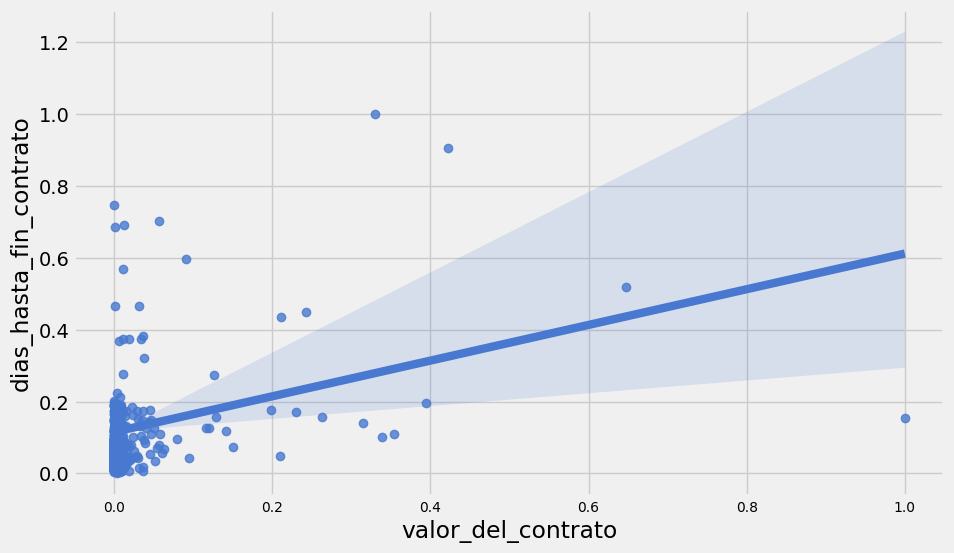

<Figure size 800x400 with 0 Axes>

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt

# Inicializar el escalador Min-Max
scaler = MinMaxScaler()

# Normalizar las variables
promedio_dias_por_valor[['valor_del_contrato', 'dias_hasta_fin_contrato']] = scaler.fit_transform(promedio_dias_por_valor[['valor_del_contrato', 'dias_hasta_fin_contrato']])

# Crear el gráfico de regresión con las variables normalizadas
plt.figure(figsize=(10, 6))
sns.regplot(x='valor_del_contrato', y='dias_hasta_fin_contrato', data=promedio_dias_por_valor)

plt.figure(figsize=(8, 4))

In [ ]:
secop.columns

Index(['Unnamed: 0', 'nombre_entidad', 'nit_entidad', 'departamento', 'ciudad',
       'localizaci_n', 'orden', 'sector', 'rama', 'entidad_centralizada',
       'proceso_de_compra', 'id_contrato', 'referencia_del_contrato',
       'estado_contrato', 'codigo_de_categoria_principal',
       'descripcion_del_proceso', 'tipo_de_contrato',
       'modalidad_de_contratacion', 'justificacion_modalidad_de',
       'fecha_de_firma', 'fecha_de_fin_del_contrato', 'condiciones_de_entrega',
       'tipodocproveedor', 'documento_proveedor', 'proveedor_adjudicado',
       'es_grupo', 'es_pyme', 'habilita_pago_adelantado', 'liquidaci_n',
       'obligaci_n_ambiental', 'obligaciones_postconsumo', 'reversion',
       'origen_de_los_recursos', 'destino_gasto', 'valor_del_contrato',
       'valor_de_pago_adelantado', 'valor_facturado',
       'valor_pendiente_de_pago', 'valor_pagado', 'valor_amortizado',
       'valor_pendiente_de', 'valor_pendiente_de_ejecucion', 'estado_bpin',
       'c_digo_bpin', 'ann

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Crear el modelo de efectos fijos
modelo_efectos_fijos = smf.ols('valor_del_contrato ~ dias_hasta_inicio_contrato + C(nit_entidad)', data=secop).fit()

# Mostrar los resultados del modelo
print(modelo_efectos_fijos.summary())

                            OLS Regression Results                            
Dep. Variable:     valor_del_contrato   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.2650
Date:                Sat, 27 Jan 2024   Prob (F-statistic):              0.607
Time:                        10:47:03   Log-Likelihood:            -1.1491e+05
No. Observations:                5325   AIC:                         2.298e+05
Df Residuals:                    5323   BIC:                         2.298e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

In [ ]:
# Calcular el coeficiente de correlación de Pearson
correlacion = secop['valor_del_contrato'].corr(secop['dias_hasta_inicio_ejecucion'])

print("Coeficiente de correlación de Pearson:", correlacion)

Coeficiente de correlación de Pearson: -0.0047246608900869055


In [ ]:
# Convierte fechas a datetime y calcula la duración en meses
secop['fecha_de_inicio_del_contrato'] = pd.to_datetime(secop['fecha_de_inicio_del_contrato'])
duracion = (secop['fecha_de_inicio_del_contrato'] - secop['fecha_de_firma']) / pd.Timedelta(days=30)

# Reemplazar valores NaN por un valor numérico, por ejemplo, 0
secop['duracion_hasta_inicio_meses'] = duracion.fillna(0).astype(int)

# Opcionalmente, puedes eliminar filas donde la duración es NaN
secop = secop[~duracion.isna()]

# Crear el modelo de efectos fijos
modelo_efectos_fijos = smf.ols('valor_del_contrato ~ dias_hasta_inicio_contrato + dias_hasta_fin_contrato + dias_hasta_inicio_ejecucion + dias_hasta_fin_ejecucion + C(nit_entidad)', data=secop).fit()

# Mostrar los resultados del modelo
print(modelo_efectos_fijos.summary())

                            OLS Regression Results                            
Dep. Variable:     valor_del_contrato   R-squared:                       0.049
Model:                            OLS   Adj. R-squared:                  0.039
Method:                 Least Squares   F-statistic:                     5.086
Date:                Sat, 27 Jan 2024   Prob (F-statistic):           0.000525
Time:                        10:51:29   Log-Likelihood:                -9054.5
No. Observations:                 402   AIC:                         1.812e+04
Df Residuals:                     397   BIC:                         1.814e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         